In [231]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

# Import

In [ ]:
pip install numpy

In [ ]:
pip install pandas

In [ ]:
pip install bs4

In [ ]:
pip install requests

In [ ]:
pip install nltk

In [ ]:
pip install matplotlib

# Jupyter notebooks

* This is a Jupyter notebook!
* Interactive. Popular in data science
* Used with Python, R, Julia.
* Mine looks slightly different
* Command vs. Edit mode
* Blocks are called "cells".
    * Run cells: ctrl/cmd + enter/return
    * New cells above: ctrl/cmd + a 
    * Code vs. md.
* Is it running?

# Ethics Of Web-Scraping

* Am I allowed to access this data? 
    * https://www.chefknivestogo.com/robots.txt
* Can the site handle my requests?
    * https://www.nrcs.usda.gov/robots.txt
* Can I use it in my research? What can I use it for?
    * https://meta.wikimedia.org/wiki/Terms_of_use

# Background: Functions, Data Types, and Pandas

## Data Types

### int (integer)

In [1]:
type(5)

int

### float (number with decimal point)

In [3]:
type(5.0)

float

### bool (True/False)

In [5]:
print(type(True))

# bools can act as ones (True) and zeros (False)
print(True + True)

print(False + False)

<class 'bool'>
2
0


### str (characters)

In [9]:
print(type('a string'))

test_str = 'a string'

print(len(test_str))

print(test_str.split())

['a', 'string']


### list

* Store multiple items (elements) in a single variable, e.g., three integers (ints). 
* Elements are separated by commas.

**Note that indices start at 0 in Python!**

In [13]:
# initialize a list
test_list = [5, 25, 125]

# print the list
print(test_list)

[5, 25, 125]


In [14]:
# print the 0th element
print(test_list[0])

5


In [15]:
# get the length of the list (number of elements in it)
len(test_list)

3

In [16]:
# lists can have mixed datatypes (pretty much anything can be put in a list)
test_list_2 = ['a', 2, [4,5]]

In [17]:
# add two lists together
# technically, this is called "concatenating" the first and second lists

print(test_list + test_list_2)

[5, 25, 125, 'a', 2, [4, 5]]


In [11]:
# list comprehension is an easy way to modify and/or filter lists
# GENERAL SYNTAX: 
    # new_list = [x for x in old_list]

# use list comprehension to recreate the same list (just to show how it works)
print([y for y in test_list])

# use list comprehension to add five to each element
print([x+5 for x in test_list])

# use list comprehension to add five to each element - using our predefined FUNCTION
print([add_five(elmnt) for elmnt in test_list])

# use list comprehension to add five to each element, AND filter them
print([x+5 for x in test_list if (x==0 or x==1)])

[0, 1, 2]
[5, 6, 7]
[5, 6, 7]
[5, 6]


### Dict (dictionary)

* A dictionary is a correspondence of key:value pairings which allow you to look up values from keys!
* Keys and values can be most datatypes
* Keys must be unique!

In [19]:
# initialize a dictionary. 
test_dict = {'key1':'value1', 2:'value2'}

In [12]:
# look up first value via key
print(test_dict['key1'])

NameError: name 'test_dict' is not defined

In [22]:
# can only do dict[key] to get value. CANNOT do dict[value] to get key
print(test_dict['value1'])

KeyError: 'value1'

## Pandas

https://pandas.pydata.org/pandas-docs/stable/index.html

### DataFrame

* 2-D tabular data variable

In [36]:
# initialize pandas dataframe from dictionary. note that lists must be the same length!

# initialize example dict
test_dict = {'col1':[1,2,3], 'col2':[4,5,6]}

# initialize pd.DataFrame
test_df = pd.DataFrame(test_dict)

In [37]:
# pretty-print test_df
test_df

col1  col2
0     1     4
1     2     5
2     3     6

In [38]:
# retrieve a specific column of the dataframe
test_df['col1']

0    1
1    2
2    3
Name: col1, dtype: int64

In [39]:
# retrieve the first row
test_df.iloc[0]

col1    1
col2    4
Name: 0, dtype: int64

In [40]:
# make a new column in the existing dataframe
test_df['new col'] = ['a', [1,2], 3]

# print
test_df

col1  col2 new col
0     1     4       a
1     2     5  [1, 2]
2     3     6       3

In [42]:
# make a new column in the existing dataframe
# by applying a function to a column
test_df['new col2'] = test_df['col1'].apply(add_five)


# print
test_df

col1  col2 new col  new col1  new col2
0     1     4       a         6         6
1     2     5  [1, 2]         7         7
2     3     6       3         8         8

# Web Scraping

## Import Necessary packages

Earlier, we *installed* the necessary packages with the "pip install [package]" commands

Now, we *import* the packages so we can use them

In [19]:
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import requests
import nltk

## pd.read_html() - USDA FIPS

* URL
    * https://www.nrcs.usda.gov/wps/portal/nrcs/detail/national/home/?cid=nrcs143_013697
* Are we supposed to do something here?
    * https://www.nrcs.usda.gov/robots.txt

In [20]:
# here's where we start using the "pandas" package

# import data from USDA. Output is a LIST of tables pandas found at the URL
usda_fips_list = pd.read_html("https://www.nrcs.usda.gov/wps/portal/nrcs/detail/national/home/?cid=nrcs143_013697")

In [21]:
# print output to see what we have...
usda_fips_list

[                                                   FIPS        Name State
 0                                                 01001     Autauga    AL
 1                                                 01003     Baldwin    AL
 2                                                 01005     Barbour    AL
 3                                                 01007        Bibb    AL
 4                                                 01009      Blount    AL
 ...                                                 ...         ...   ...
 3228                                              72153       Yauco    PR
 3229                                              78010   St. Croix    VI
 3230                                              78020    St. John    VI
 3231                                              78030  St. Thomas    VI
 3232  //<![CDATA[ var $s = {} var isClick = false; $...         NaN   NaN
 
 [3233 rows x 3 columns],
                                                    FIPS        Name Sta

In [23]:
# examine the zero-th element in the list (have to start somewhere!)
usda_fips_list[0]

FIPS        Name State
0                                                 01001     Autauga    AL
1                                                 01003     Baldwin    AL
2                                                 01005     Barbour    AL
3                                                 01007        Bibb    AL
4                                                 01009      Blount    AL
...                                                 ...         ...   ...
3228                                              72153       Yauco    PR
3229                                              78010   St. Croix    VI
3230                                              78020    St. John    VI
3231                                              78030  St. Thomas    VI
3232  //<![CDATA[ var $s = {} var isClick = false; $...         NaN   NaN

[3233 rows x 3 columns]

In [25]:
# make variable for fips table we want
usda_fips = usda_fips_list[0]

In [46]:
# the last row is incorrect, so let's delete it

# here's what the dataframe looks like without the last column
usda_fips.drop(3232)

FIPS                             Name State
0     01001                          Autauga    AL
1     01003                          Baldwin    AL
2     01005                          Barbour    AL
3     01007                             Bibb    AL
4     01009                           Blount    AL
5     01011                          Bullock    AL
6     01013                           Butler    AL
7     01015                          Calhoun    AL
8     01017                         Chambers    AL
9     01019                         Cherokee    AL
10    01021                          Chilton    AL
11    01023                          Choctaw    AL
12    01025                           Clarke    AL
13    01027                             Clay    AL
14    01029                         Cleburne    AL
15    01031                           Coffee    AL
16    01033                          Colbert    AL
17    01035                          Conecuh    AL
18    01037                            Coosa    AL
19    01039                        Covington    AL
20    01041                         Crenshaw    AL
21    01043                          Cullman    AL
22    01045                             Dale    AL
23    01047                           Dallas    AL
24    01049                          De Kalb    AL
25    01051                           Elmore    AL
26    01053                         Escambia    AL
27    01055                           Etowah    AL
28    01057                          Fayette    AL
29    01059                         Franklin    AL
30    01061                           Geneva    AL
31    01063                           Greene    AL
32    01065                             Hale    AL
33    01067                            Henry    AL
34    01069                          Houston    AL
35    01071                          Jackson    AL
36    01073                        Jefferson    AL
37    01075                            Lamar    AL
38    01077                       Lauderdale    AL
39    01079                         Lawrence    AL
40    01081                              Lee    AL
41    01083                        Limestone    AL
42    01085                          Lowndes    AL
43    01087                            Macon    AL
44    01089                          Madison    AL
45    01091                          Marengo    AL
46    01093                           Marion    AL
47    01095                         Marshall    AL
48    01097                           Mobile    AL
49    01099                           Monroe    AL
50    01101                       Montgomery    AL
51    01103                           Morgan    AL
52    01105                            Perry    AL
53    01107                          Pickens    AL
54    01109                             Pike    AL
55    01111                         Randolph    AL
56    01113                          Russell    AL
57    01115                         St Clair    AL
58    01117                           Shelby    AL
59    01119                           Sumter    AL
60    01121                        Talladega    AL
61    01123                       Tallapoosa    AL
62    01125                       Tuscaloosa    AL
63    01127                           Walker    AL
64    01129                       Washington    AL
65    01131                           Wilcox    AL
66    01133                          Winston    AL
67    02013                   Aleutians East    AK
68    02016                   Aleutians West    AK
69    02020                        Anchorage    AK
70    02050                           Bethel    AK
71    02060                      Bristol Bay    AK
72    02068                           Denali    AK
73    02070                       Dillingham    AK
74    02090             Fairbanks North Star    AK
75    02100                           Haines    AK
76    02110                           Juneau    AK
77    02122                  

In [49]:
# looks good so let's make this a permanent change!
usda_fips = usda_fips.drop(3232)

In [50]:
# Let's confirm there are no other rows we need to drop. Check for nan values in any col pt. 1
usda_fips.isnull()

FIPS   Name  State
0     False  False  False
1     False  False  False
2     False  False  False
3     False  False  False
4     False  False  False
5     False  False  False
6     False  False  False
7     False  False  False
8     False  False  False
9     False  False  False
10    False  False  False
11    False  False  False
12    False  False  False
13    False  False  False
14    False  False  False
15    False  False  False
16    False  False  False
17    False  False  False
18    False  False  False
19    False  False  False
20    False  False  False
21    False  False  False
22    False  False  False
23    False  False  False
24    False  False  False
25    False  False  False
26    False  False  False
27    False  False  False
28    False  False  False
29    False  False  False
30    False  False  False
31    False  False  False
32    False  False  False
33    False  False  False
34    False  False  False
35    False  False  False
36    False  False  False
37    False  False  False
38    False  False  False
39    False  False  False
40    False  False  False
41    False  False  False
42    False  False  False
43    False  False  False
44    False  False  False
45    False  False  False
46    False  False  False
47    False  False  False
48    False  False  False
49    False  False  False
50    False  False  False
51    False  False  False
52    False  False  False
53    False  False  False
54    False  False  False
55    False  False  False
56    False  False  False
57    False  False  False
58    False  False  False
59    False  False  False
60    False  False  False
61    False  False  False
62    False  False  False
63    False  False  False
64    False  False  False
65    False  False  False
66    False  False  False
67    False  False  False
68    False  False  False
69    False  False  False
70    False  False  False
71    False  False  False
72    False  False  False
73    False  False  False
74    False  False  False
75    False  False  False
76    False  False  False
77    False  False  False
78    False  False  False
79    False  False  False
80    False  False  False
81    False  False  False
82    False  False  False
83    False  False  False
84    False  False  False
85    False  False  False
86    False  False  False
87    False  False  False
88    False  False  False
89    False  False  False
90    False  False  False
91    False  False  False
92    False  False  False
93    False  False  False
94    False  False  False
95    False  False  False
96    False  False  False
97    False  False  False
98    False  False  False
99    False  False  False
100   False  False  False
101   False  False  False
102   False  False  False
103   False  False  False
104   False  False  False
105   False  False  False
106   False  False  False
107   False  False  False
108   False  False  False
109   False  False  False
110   False  False  False
111   False  False  False
112   False  False  False
113   False  False  False
114   False  False  False
115   False  False  False
116   False  False  False
117   False  False  False
118   False  False  False
119   False  False  False
120   False  False  False
121   False  False  False
122   False  False  False
123   False  False  False
124   False  False  False
125   False  False  False
126   False  False  False
127   False  False  False
128   False  False  False
129   False  False  False
130   False  False  False
131   False  False  False
132   False  False  False
133   False  False  False
134   False  False  False
135   False  False  False
136   False  False  False
137   False  False  False
138   False  False  False
139   False  False  False
140   False  False  False
141   False  False  False
142   False  False  False
143   False  False  False
144   False  False  False
145   False  False  False
146   False  False  False
147   False  False  False
148   False  False  False
149   False  False  False
150   False  False  False
151   False  False  False
152   False  False  False
153

In [51]:
# Check for nan values in any col pt. 2
usda_fips.isnull().sum()

FIPS     0
Name     0
State    0
dtype: int64

In [52]:
# let's examine the dataframe more closely to make sure everything is correct

# change display options to show all rows
pd.set_option('display.max_rows', None)

usda_fips

FIPS                             Name State
0     01001                          Autauga    AL
1     01003                          Baldwin    AL
2     01005                          Barbour    AL
3     01007                             Bibb    AL
4     01009                           Blount    AL
5     01011                          Bullock    AL
6     01013                           Butler    AL
7     01015                          Calhoun    AL
8     01017                         Chambers    AL
9     01019                         Cherokee    AL
10    01021                          Chilton    AL
11    01023                          Choctaw    AL
12    01025                           Clarke    AL
13    01027                             Clay    AL
14    01029                         Cleburne    AL
15    01031                           Coffee    AL
16    01033                          Colbert    AL
17    01035                          Conecuh    AL
18    01037                            Coosa    AL
19    01039                        Covington    AL
20    01041                         Crenshaw    AL
21    01043                          Cullman    AL
22    01045                             Dale    AL
23    01047                           Dallas    AL
24    01049                          De Kalb    AL
25    01051                           Elmore    AL
26    01053                         Escambia    AL
27    01055                           Etowah    AL
28    01057                          Fayette    AL
29    01059                         Franklin    AL
30    01061                           Geneva    AL
31    01063                           Greene    AL
32    01065                             Hale    AL
33    01067                            Henry    AL
34    01069                          Houston    AL
35    01071                          Jackson    AL
36    01073                        Jefferson    AL
37    01075                            Lamar    AL
38    01077                       Lauderdale    AL
39    01079                         Lawrence    AL
40    01081                              Lee    AL
41    01083                        Limestone    AL
42    01085                          Lowndes    AL
43    01087                            Macon    AL
44    01089                          Madison    AL
45    01091                          Marengo    AL
46    01093                           Marion    AL
47    01095                         Marshall    AL
48    01097                           Mobile    AL
49    01099                           Monroe    AL
50    01101                       Montgomery    AL
51    01103                           Morgan    AL
52    01105                            Perry    AL
53    01107                          Pickens    AL
54    01109                             Pike    AL
55    01111                         Randolph    AL
56    01113                          Russell    AL
57    01115                         St Clair    AL
58    01117                           Shelby    AL
59    01119                           Sumter    AL
60    01121                        Talladega    AL
61    01123                       Tallapoosa    AL
62    01125                       Tuscaloosa    AL
63    01127                           Walker    AL
64    01129                       Washington    AL
65    01131                           Wilcox    AL
66    01133                          Winston    AL
67    02013                   Aleutians East    AK
68    02016                   Aleutians West    AK
69    02020                        Anchorage    AK
70    02050                           Bethel    AK
71    02060                      Bristol Bay    AK
72    02068                           Denali    AK
73    02070                       Dillingham    AK
74    02090             Fairbanks North Star    AK
75    02100                           Haines    AK
76    02110                           Juneau    AK
77    02122                  

In [ ]:
# the table looks good so let's save it as a .csv and move on
usda_fips.to_csv("USDA FIPS.csv")

## pd.read_html() -  Wikipedia FIPS

Same data, different source.

This one needs more processing/cleaning

* URL
    * https://en.wikipedia.org/wiki/List_of_United_States_FIPS_codes_by_county
* robots.txt
    * https://en.wikipedia.org/robots.txt

In [54]:
# import data from wikipedia. Again, output is a LIST of tables
wiki_fips_list = pd.read_html("https://en.wikipedia.org/wiki/List_of_United_States_FIPS_codes_by_county")

In [55]:
# let's print the output and take a look...
wiki_fips_list

[    0                                                  1
 0 NaN  This article may be too long to read and navig...,
        FIPS                          County or equivalent  \
 0      1001                                Autauga County   
 1      1003                                Baldwin County   
 2      1005                                Barbour County   
 3      1007                                   Bibb County   
 4      1009                                 Blount County   
 5      1011                                Bullock County   
 6      1013                                 Butler County   
 7      1015                                Calhoun County   
 8      1017                               Chambers County   
 9      1019                               Cherokee County   
 10     1021                                Chilton County   
 11     1023                                Choctaw County   
 12     1025                                 Clarke County   
 13     1027   

In [56]:
# zero-th element (table)?
wiki_fips_list[0]

0                                                  1
0 NaN  This article may be too long to read and navig...

In [57]:
# first element (table)?
wiki_fips_list[1]

FIPS                          County or equivalent  \
0      1001                                Autauga County   
1      1003                                Baldwin County   
2      1005                                Barbour County   
3      1007                                   Bibb County   
4      1009                                 Blount County   
5      1011                                Bullock County   
6      1013                                 Butler County   
7      1015                                Calhoun County   
8      1017                               Chambers County   
9      1019                               Cherokee County   
10     1021                                Chilton County   
11     1023                                Choctaw County   
12     1025                                 Clarke County   
13     1027                                   Clay County   
14     1029                               Cleburne County   
15     1031                                 Coffee County   
16     1033                                Colbert County   
17     1035                                Conecuh County   
18     1037                                  Coosa County   
19     1039                              Covington County   
20     1041                               Crenshaw County   
21     1043                                Cullman County   
22     1045                                   Dale County   
23     1047                                 Dallas County   
24     1049                                 DeKalb County   
25     1051                                 Elmore County   
26     1053                               Escambia County   
27     1055                                 Etowah County   
28     1057                                Fayette County   
29     1059                               Franklin County   
30     1061                                 Geneva County   
31     1063                                 Greene County   
32     1065                                   Hale County   
33     1067                                  Henry County   
34     1069                                Houston County   
35     1071                                Jackson County   
36     1073                              Jefferson County   
37     1075                                  Lamar County   
38     1077                             Lauderdale County   
39     1079                               Lawrence County   
40     1081                                    Lee County   
41     1083                              Limestone County   
42     1085                                Lowndes County   
43     1087                                  Macon County   
44     1089                                Madison County   
45     1091                                Marengo County   
46     1093                                 Marion County   
47     1095                               Marshall County   
48     1097                                 Mobile County   
49     1099                                 Monroe County   
50     1101                             Montgomery County   
51     1103                                 Morgan County   
52     1105                                  Perry County   
53     1107                                Pickens County   
54     1109                                   Pike County   
55     1111                               Randolph County   
56     1113                                Russell County   
57     1115                              St. Clair County   
58     1117                                 Shelby County   
59     1119                                 Sumter County   
60     1121                              Talladega County   
61     1123                             Tallapoosa County   
62     1125                             Tuscaloosa County   
63     1127                                 Walker County   
64     1129                             Wa

In [53]:
# assign correctly parsed table to variable
fips = wiki_fips_list[1]

# remove all hyperlinks (these look like "... County [h]", etc.)
fips['County or equivalent'] = fips['County or equivalent'].str.replace(r"\[.*\]","")

# convert to uppercase
def make_uppercase(string):
    return string.upper()

fips['County or equivalent'] = fips['County or equivalent'].apply(make_uppercase)
fips['State or equivalent'] = fips['State or equivalent'].apply(make_uppercase)

# replace "St." with "Saint"
fips['County or equivalent'] = [x.replace('ST.','SAINT') for x in fips['County or equivalent']]

# remove everything after a comma in a county name (e.g. "ANCHORAGE, MUNICIPALITY OF")
fips['County or equivalent'] = [x.split(',')[0] for x in fips['County or equivalent']]

SyntaxError: invalid syntax (<ipython-input-53-ca2a0539e97a>, line 29)

## Request  + BeautifulSoup

 Red-bellied Snake (Wikipedia) Text Analysis

### Red-bellied Snake (Wikipedia) Text Analysis

Hypothetical: we want to get a list of all words, and their frequency, from this wikipedia page

In [172]:
# use requests to get URL
wiki_snake_response = requests.get("https://en.wikipedia.org/wiki/Red-bellied_black_snake")

# it prints "200" if the page was successfully downloaded!
print(wiki_snake_response)

# another way to check it worked - we can just ask :)
print(wiki_snake_response.ok)

<Response [200]>
True


In [173]:
#let's examine the output... which turns out to be a mess (this is where BeautifulSoup becomes necessary)
wiki_snake_response.text

'<!DOCTYPE html>\n<html class="client-nojs" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>Red-bellied black snake - Wikipedia</title>\n<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"c8311173-718d-4071-8e33-141537960614","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Red-bellied_black_snake","wgTitle":"Red-bellied black snake","wgCurRevisionId":1033489125,"wgRevisionId":1033489125,"wgArticleId":2290687,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles containing Ancient Greek (to 1453)-language text","CS1 French-language sources (fr)","CS1 German-language sources (de)","C

In [174]:
# use BeautifulSoup's html parser to convert the html document into a BeautifulSoup object
wiki_snake_soup = BeautifulSoup(wiki_snake_response.text, 'html.parser')

# BeautifulSoup sometimes gives us a more readable format, but not this time - the BeautifulSoup object () is no more readable than the 
wiki_snake_soup.prettify()

'<!DOCTYPE html>\n<html class="client-nojs" dir="ltr" lang="en">\n <head>\n  <meta charset="utf-8"/>\n  <title>\n   Red-bellied black snake - Wikipedia\n  </title>\n  <script>\n   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"c8311173-718d-4071-8e33-141537960614","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Red-bellied_black_snake","wgTitle":"Red-bellied black snake","wgCurRevisionId":1033489125,"wgRevisionId":1033489125,"wgArticleId":2290687,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles containing Ancient Greek (to 1453)-language text","CS1 French-language sources (fr)","CS1 German-lang

In [175]:
# we need to isolate the article's text and get rid of the rest! we'll do that by getting all html elements with a "p" (paragraph) tag
for paragraph in wiki_snake_soup.find_all('p'):
    print(paragraph)

<p class="mw-empty-elt">
</p>
<p class="mw-empty-elt">
</p>
<p>The <b>red-bellied black snake</b> (<i>Pseudechis porphyriacus</i>) is a <a href="/wiki/Species" title="Species">species</a> of <a href="/wiki/Venomous_snake" title="Venomous snake">venomous snake</a> in the <a href="/wiki/Family_(biology)" title="Family (biology)">family</a> <a href="/wiki/Elapidae" title="Elapidae">Elapidae</a>, indigenous to <a href="/wiki/Australia" title="Australia">Australia</a>. Originally described by <a href="/wiki/George_Shaw" title="George Shaw">George Shaw</a> in 1794 as a species new to science, it is one of <a class="mw-redirect" href="/wiki/Eastern_Australia" title="Eastern Australia">eastern Australia</a>'s most commonly encountered snakes. Averaging around 1.25 m (4 ft 1 in) in length, it has glossy black upperparts, bright red or orange flanks, and a pink or dull red belly. It is not aggressive and generally retreats from human encounters, but can attack if provoked.  Although its <a href=

In [176]:
# let's get the text out of each of these paragraph elements

for paragraph in wiki_snake_soup.find_all('p'):
    print(paragraph.text)





The red-bellied black snake (Pseudechis porphyriacus) is a species of venomous snake in the family Elapidae, indigenous to Australia. Originally described by George Shaw in 1794 as a species new to science, it is one of eastern Australia's most commonly encountered snakes. Averaging around 1.25 m (4 ft 1 in) in length, it has glossy black upperparts, bright red or orange flanks, and a pink or dull red belly. It is not aggressive and generally retreats from human encounters, but can attack if provoked.  Although its venom can cause significant illness, no deaths have been recorded from its bite, which is less venomous than other Australian elapid snakes. The venom contains neurotoxins, myotoxins, and coagulants and has haemolytic properties. Victims can also lose their sense of smell.

Common in woodlands, forests and swamplands, the red-bellied black snake often ventures into nearby urban areas. It forages in bodies of shallow water, commonly with tangles of water plants and logs, 

In [177]:
# we need to take all of these paragraphs and merge them into one large string (remember our overall goal)

wiki_snake_text = ' '.join([paragraph.text for paragraph in wiki_snake_soup.find_all('p')])

wiki_snake_text

'\n \n The red-bellied black snake (Pseudechis porphyriacus) is a species of venomous snake in the family Elapidae, indigenous to Australia. Originally described by George Shaw in 1794 as a species new to science, it is one of eastern Australia\'s most commonly encountered snakes. Averaging around 1.25\xa0m (4\xa0ft 1\xa0in) in length, it has glossy black upperparts, bright red or orange flanks, and a pink or dull red belly. It is not aggressive and generally retreats from human encounters, but can attack if provoked.  Although its venom can cause significant illness, no deaths have been recorded from its bite, which is less venomous than other Australian elapid snakes. The venom contains neurotoxins, myotoxins, and coagulants and has haemolytic properties. Victims can also lose their sense of smell.\n Common in woodlands, forests and swamplands, the red-bellied black snake often ventures into nearby urban areas. It forages in bodies of shallow water, commonly with tangles of water pla

In [178]:
# now let's count occurences of each word
# this is where we use the "nltk" package.
# import nltk

nltk.FreqDist(wiki_snake_text)

FreqDist({' ': 2352, 'e': 1481, 'a': 1045, 'n': 876, 't': 845, 's': 814, 'i': 775, 'r': 738, 'o': 729, 'l': 602, ...})

In [179]:
# split the FreqDist input by word
split_wiki_snake_text = wiki_snake_text.split()

# print 
print(split_wiki_snake_text)

['The', 'red-bellied', 'black', 'snake', '(Pseudechis', 'porphyriacus)', 'is', 'a', 'species', 'of', 'venomous', 'snake', 'in', 'the', 'family', 'Elapidae,', 'indigenous', 'to', 'Australia.', 'Originally', 'described', 'by', 'George', 'Shaw', 'in', '1794', 'as', 'a', 'species', 'new', 'to', 'science,', 'it', 'is', 'one', 'of', 'eastern', "Australia's", 'most', 'commonly', 'encountered', 'snakes.', 'Averaging', 'around', '1.25', 'm', '(4', 'ft', '1', 'in)', 'in', 'length,', 'it', 'has', 'glossy', 'black', 'upperparts,', 'bright', 'red', 'or', 'orange', 'flanks,', 'and', 'a', 'pink', 'or', 'dull', 'red', 'belly.', 'It', 'is', 'not', 'aggressive', 'and', 'generally', 'retreats', 'from', 'human', 'encounters,', 'but', 'can', 'attack', 'if', 'provoked.', 'Although', 'its', 'venom', 'can', 'cause', 'significant', 'illness,', 'no', 'deaths', 'have', 'been', 'recorded', 'from', 'its', 'bite,', 'which', 'is', 'less', 'venomous', 'than', 'other', 'Australian', 'elapid', 'snakes.', 'The', 'venom'

In [180]:
# let's try FreqDist again
wiki_snake_word_freqs = nltk.FreqDist(split_wiki_snake_text)

# print
wiki_snake_word_freqs

FreqDist({'and': 83, 'the': 76, 'in': 62, 'to': 60, 'of': 50, 'black': 43, 'a': 40, 'red-bellied': 33, 'snake': 32, 'is': 28, ...})

In [181]:
# dict --> pd.DataFrame
wiki_snake_df = pd.DataFrame({'Word': wiki_snake_word_freqs.keys(), 'Frequency': wiki_snake_word_freqs.values()})

# print
wiki_snake_df

Word  Frequency
0                        The         26
1                red-bellied         33
2                      black         43
3                      snake         32
4                (Pseudechis          2
5              porphyriacus)          1
6                         is         28
7                          a         40
8                    species         12
9                         of         50
10                  venomous          3
11                        in         62
12                       the         76
13                    family          1
14                 Elapidae,          1
15                indigenous          1
16                        to         60
17                Australia.          1
18                Originally          1
19                 described          5
20                        by         11
21                    George          2
22                      Shaw          2
23                      1794          1
24                        as         20
25                       new          1
26                  science,          1
27                        it         19
28                       one          4
29                   eastern          5
30               Australia's          1
31                      most          7
32                  commonly          7
33               encountered          2
34                   snakes.          2
35                 Averaging          1
36                    around          7
37                      1.25          2
38                         m          7
39                        (4          2
40                        ft          4
41                         1          2
42                       in)          5
43                   length,          1
44                       has         14
45                    glossy          2
46               upperparts,          1
47                    bright          2
48                       red          6
49                        or         22
50                    orange          2
51                   flanks,          1
52                       and         83
53                      pink          4
54                      dull          2
55                    belly.          3
56                        It         11
57                       not          7
58                aggressive          2
59                 generally          7
60                  retreats          1
61                      from         16
62                     human          1
63               encounters,          1
64                       but          6
65                       can         19
66                    attack          1
67                        if          2
68                 provoked.          1
69                  Although          3
70                       its         10
71                     venom          6
72                     cause          1
73               significant          1
74                  illness,          1
75                        no          2
76                    deaths          2
77                      have         15
78                      been         12
79                  recorded          5
80                     bite,          2
81                     which         12
82                      less          5
83                      than          6
84                     other          7
85                Australian          3
86                    elapid          3
87                  contains          3
88              neurotoxins,          2
89                myotoxins,          2
90                coagulants          2
91                haemolytic          2
92               properties.          1
93                   Victims          1
94                      also          7
95                      lose          1
96                     their         13
97                     sense          2
98                    smell.          1
99                    Co

In [182]:
# sort
wiki_snake_df = wiki_snake_df.sort_values('Frequency', ascending=False)

wiki_snake_df

Word  Frequency
52                       and         83
12                       the         76
11                        in         62
16                        to         60
9                         of         50
2                      black         43
7                          a         40
1                red-bellied         33
3                      snake         32
6                         is         28
0                        The         26
133                      are         22
49                        or         22
24                        as         20
65                       can         19
27                        it         19
309                       on         17
389                   snakes         16
61                      from         16
135                       be         15
113                     with         15
77                      have         15
44                       has         14
143                      was         14
96                     their         13
519                     they         12
78                      been         12
8                    species         12
81                     which         12
551                      may         11
56                        It         11
218                      for         11
20                        by         11
70                       its         10
240                    found          8
241                     that          8
32                  commonly          7
281                    South          7
84                     other          7
94                      also          7
541                     They          7
59                 generally          7
57                       not          7
316                       In          7
361                       at          7
31                      most          7
36                    around          7
38                         m          7
83                      than          6
48                       red          6
105                     into          6
613                   active          6
594                     when          6
71                     venom          6
115                    water          6
521                       up          6
245                       an          6
64                       but          6
286                     even          5
215                    genus          5
19                 described          5
149                      New          5
79                  recorded          5
29                   eastern          5
370                        A          5
290                     were          5
42                       in)          5
82                      less          5
193                    under          4
225                     more          4
246                    early          4
329                     body          4
427                      his          4
332                    brown          4
510                Australia          4
348                   scales          4
121                     prey          4
243                      Its          4
162                   snake,          4
339                     head          4
610                     bite          4
28                       one          4
53                      pink          4
40                        ft          4
123                   frogs,          3
472                    areas          3
816                    while          3
69                  Although          3
589                preferred          3
735                      out          3
117                    logs,          3
118                    where          3
357                  average          3
120                     main          3
175                     name          3
10                  venomous          3
107                    urban          3
144                    first          3
127                    small          3
307                     

In [183]:
# let's convert frequency into a percentage

# first, total up the number of words
wiki_snake_total_num_words = wiki_snake_df['Frequency'].sum()

# make a % frequency column in wiki_snake_df
wiki_snake_df['% Freq'] = (wiki_snake_df['Frequency'] / wiki_snake_total_num_words) * 100

# print
wiki_snake_df

Word  Frequency    % Freq
52                       and         83  3.487395
12                       the         76  3.193277
11                        in         62  2.605042
16                        to         60  2.521008
9                         of         50  2.100840
2                      black         43  1.806723
7                          a         40  1.680672
1                red-bellied         33  1.386555
3                      snake         32  1.344538
6                         is         28  1.176471
0                        The         26  1.092437
133                      are         22  0.924370
49                        or         22  0.924370
24                        as         20  0.840336
65                       can         19  0.798319
27                        it         19  0.798319
309                       on         17  0.714286
389                   snakes         16  0.672269
61                      from         16  0.672269
135                       be         15  0.630252
113                     with         15  0.630252
77                      have         15  0.630252
44                       has         14  0.588235
143                      was         14  0.588235
96                     their         13  0.546218
519                     they         12  0.504202
78                      been         12  0.504202
8                    species         12  0.504202
81                     which         12  0.504202
551                      may         11  0.462185
56                        It         11  0.462185
218                      for         11  0.462185
20                        by         11  0.462185
70                       its         10  0.420168
240                    found          8  0.336134
241                     that          8  0.336134
32                  commonly          7  0.294118
281                    South          7  0.294118
84                     other          7  0.294118
94                      also          7  0.294118
541                     They          7  0.294118
59                 generally          7  0.294118
57                       not          7  0.294118
316                       In          7  0.294118
361                       at          7  0.294118
31                      most          7  0.294118
36                    around          7  0.294118
38                         m          7  0.294118
83                      than          6  0.252101
48                       red          6  0.252101
105                     into          6  0.252101
613                   active          6  0.252101
594                     when          6  0.252101
71                     venom          6  0.252101
115                    water          6  0.252101
521                       up          6  0.252101
245                       an          6  0.252101
64                       but          6  0.252101
286                     even          5  0.210084
215                    genus          5  0.210084
19                 described          5  0.210084
149                      New          5  0.210084
79                  recorded          5  0.210084
29                   eastern          5  0.210084
370                        A          5  0.210084
290                     were          5  0.210084
42                       in)          5  0.210084
82                      less          5  0.210084
193                    under          4  0.168067
225                     more          4  0.168067
246                    early          4  0.168067
329                     body          4  0.168067
427                      his          4  0.168067
332                    brown          4  0.168067
510                Australia          4  0.168067
348                   scales          4  0.168067
121                     prey          4  0.168067
243                      Its          4  0.168067
162                   snake,          4  0.168067
339                     

In [184]:
# plot word frequency
wiki_snake_df.plot.bar(x='Word', y='Frequency', figsize=(9,6))

<AxesSubplot:xlabel='Word'>

In [185]:
# make a better plot of word frequency
wiki_snake_df[wiki_snake_df['% Freq'] > .5].plot.bar(x='Word', y='Frequency', figsize=(9,6), rot=45)#, log=True)

<AxesSubplot:xlabel='Word'>

<AxesSubplot:ylabel='% Freq'>

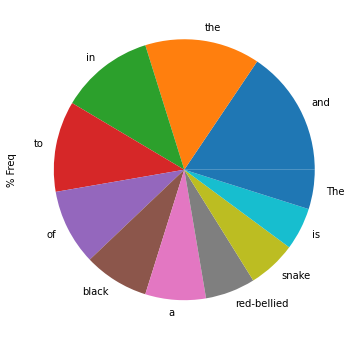

In [188]:
# pie chart (notice caps)
wiki_snake_df[wiki_snake_df['% Freq'] > 1].set_index('Word').plot.pie(y='% Freq', figsize=(9,6), legend=False)

In [ ]:
# save to .csv
wiki_snake_df.to_csv("Red Bellied Snake Words & Frequencies.csv")

## Request  + BeautifulSoup - lichess.org user stats

Let's get the information of every top "bullet" chess player

Our approach:
* Get the list of top bullet players
    * Listed at https://lichess.org/player/top/200/bullet
* Go to each player's account
    * Account page URLs have the following structure: "https://lichess.org/@/" + username
* Get the information we need and compile it into a pandas DataFrame
    * Do this by writing several functions to get specific pieces of information
    
* Save the dataframe as a .csv file

In [164]:
# here are the top bullet players: https://lichess.org/player/top/200/bullet

# scrape this table!
players_df_list = pd.read_html("https://lichess.org/player/top/200/bullet")

# let's see the output:
players_df_list

[       0                     1     2     3
 0      1     GM nihalsarin2004  3101  25.0
 1      2         GM C9C9C9C9C9  3068  21.0
 2      3    GM Zhigalko_Sergei  3051  26.0
 3      4           GM muisback  3018  15.0
 4      5             GM Arka50  3016  29.0
 ..   ...                   ...   ...   ...
 195  196         GM elshan1985  2780  28.0
 196  197  GM tornike_sanikidze  2780  17.0
 197  198        Hellblazer2007  2780  30.0
 198  199             Likonendy  2779   3.0
 199  200           FM Kaldas90  2778   2.0
 
 [200 rows x 4 columns]]

In [165]:
# looks like we only need/want the first dataframe in this list (turns out there's only one anyway)
players_df = players_df_list[0]

del players_df_list

In [166]:
players_df

0                     1     2     3
0      1     GM nihalsarin2004  3101  25.0
1      2         GM C9C9C9C9C9  3068  21.0
2      3    GM Zhigalko_Sergei  3051  26.0
3      4           GM muisback  3018  15.0
4      5             GM Arka50  3016  29.0
..   ...                   ...   ...   ...
195  196         GM elshan1985  2780  28.0
196  197  GM tornike_sanikidze  2780  17.0
197  198        Hellblazer2007  2780  30.0
198  199             Likonendy  2779   3.0
199  200           FM Kaldas90  2778   2.0

[200 rows x 4 columns]

In [167]:
# column 0 is the user's ranking, and column 3 is their recent rating change. we aren't interested in either, so let's delete them
del players_df[0], players_df[3]

players_df

1     2
0       GM nihalsarin2004  3101
1           GM C9C9C9C9C9  3068
2      GM Zhigalko_Sergei  3051
3             GM muisback  3018
4               GM Arka50  3016
..                    ...   ...
195         GM elshan1985  2780
196  GM tornike_sanikidze  2780
197        Hellblazer2007  2780
198             Likonendy  2779
199           FM Kaldas90  2778

[200 rows x 2 columns]

In [168]:
# now let's rename the columns to more helpful labels
players_df.rename(columns={1:'User', 2:'Rating'})

User  Rating
0       GM nihalsarin2004    3101
1           GM C9C9C9C9C9    3068
2      GM Zhigalko_Sergei    3051
3             GM muisback    3018
4               GM Arka50    3016
..                    ...     ...
195         GM elshan1985    2780
196  GM tornike_sanikidze    2780
197        Hellblazer2007    2780
198             Likonendy    2779
199           FM Kaldas90    2778

[200 rows x 2 columns]

In [169]:
players_df.rename(columns={1:'User', 2:'Rating'}, inplace=True)

In [170]:
# make a short function to give us individual players' urls from username, for convenience
def indiv_URL_formula(username):
    return "https://lichess.org/@/" + username

In [171]:
# url of first user's account
# "https://lichess.org/@/" + ' '.join(players_df['User'].iloc[0].split())
indiv_URL_formula(players_df['User'].iloc[0])

# equivalent to: "https://lichess.org/@/" + players_df['User'].iloc[0]

'https://lichess.org/@/GM\xa0nihalsarin2004'

In [172]:
# replace "/xa0"

def replace_xa0(username):
    '''
    input = a player's username (string)
    output = a player's username, with "\xa0" replaced by " "
    '''
    return username.replace("\xa0", " ")

# apply this function to our dataframe
## first, let's check to see that it returns the right output
players_df['User'].apply(replace_xa0)

## looks good (or at least not harmful), so let's replace the username
players_df['User'] = players_df['User'].apply(replace_xa0)

In [173]:
# retry printing url of first user's account
indiv_URL_formula(players_df['User'].iloc[0])

'https://lichess.org/@/GM nihalsarin2004'

In [174]:
# we need to split the "User" column, otherwise we get urls like "https://lichess.org/@/GM RebeccaHarris" instead of "https://lichess.org/@/RebeccaHarris"

def get_user(title_user_str):
    """
    title_user_str looks like "GM RebeccaHarris" or "Shprot86"
    """
#     print(title_user_str)
    if len(title_user_str.split())==2:    #if the user is titled (has two words in their user field, rather than one)
#         print(title_user_str.split()[1])
        return title_user_str.split()[1]   #return their username
    else:    # if the user is not titled (has one word in their user field)
        return title_user_str    #return the input string, since it is already their username without a title


def get_title(title_user_str):
    """
    title_user_str looks like "GM RebeccaHarris" or "Shprot86"
    """
    if len(title_user_str.split())==2:    #if the user is titled (has two words in their user field, rather than one)
        return title_user_str.split()[0]   #return their title
    else:    # if the user is not titled (has one word in their user field)
        return  np.nan    #return a missing value

    
players_df['Username'] = players_df['User'].apply(get_user)
players_df['Title'] = players_df['User'].apply(get_title)

In [175]:
players_df

User  Rating           Username Title
0       GM nihalsarin2004    3101     nihalsarin2004    GM
1           GM C9C9C9C9C9    3068         C9C9C9C9C9    GM
2      GM Zhigalko_Sergei    3051    Zhigalko_Sergei    GM
3             GM muisback    3018           muisback    GM
4               GM Arka50    3016             Arka50    GM
..                    ...     ...                ...   ...
195         GM elshan1985    2780         elshan1985    GM
196  GM tornike_sanikidze    2780  tornike_sanikidze    GM
197        Hellblazer2007    2780     Hellblazer2007   NaN
198             Likonendy    2779          Likonendy   NaN
199           FM Kaldas90    2778           Kaldas90    FM

[200 rows x 4 columns]

In [176]:
players_df['URL'] = players_df['Username'].apply(indiv_URL_formula)

In [177]:
players_df

User  Rating           Username Title  \
0       GM nihalsarin2004    3101     nihalsarin2004    GM   
1           GM C9C9C9C9C9    3068         C9C9C9C9C9    GM   
2      GM Zhigalko_Sergei    3051    Zhigalko_Sergei    GM   
3             GM muisback    3018           muisback    GM   
4               GM Arka50    3016             Arka50    GM   
..                    ...     ...                ...   ...   
195         GM elshan1985    2780         elshan1985    GM   
196  GM tornike_sanikidze    2780  tornike_sanikidze    GM   
197        Hellblazer2007    2780     Hellblazer2007   NaN   
198             Likonendy    2779          Likonendy   NaN   
199           FM Kaldas90    2778           Kaldas90    FM   

                                         URL  
0       https://lichess.org/@/nihalsarin2004  
1           https://lichess.org/@/C9C9C9C9C9  
2      https://lichess.org/@/Zhigalko_Sergei  
3             https://lichess.org/@/muisback  
4               https://lichess.org/@/Arka50  
..                                       ...  
195         https://lichess.org/@/elshan1985  
196  https://lichess.org/@/tornike_sanikidze  
197     https://lichess.org/@/Hellblazer2007  
198          https://lichess.org/@/Likonendy  
199           https://lichess.org/@/Kaldas90  

[200 rows x 5 columns]

In [178]:
players_df['URL']

0         https://lichess.org/@/nihalsarin2004
1             https://lichess.org/@/C9C9C9C9C9
2        https://lichess.org/@/Zhigalko_Sergei
3               https://lichess.org/@/muisback
4                 https://lichess.org/@/Arka50
                        ...                   
195           https://lichess.org/@/elshan1985
196    https://lichess.org/@/tornike_sanikidze
197       https://lichess.org/@/Hellblazer2007
198            https://lichess.org/@/Likonendy
199             https://lichess.org/@/Kaldas90
Name: URL, Length: 200, dtype: object

#### Write functions to get statistics from individual pages

In [179]:
# first, let's scrape the first user's page, so we have an example to work with
first_player_url = "https://lichess.org/@/" + players_df['Username'].iloc[0]

first_player_response = requests.get(first_player_url)
    
first_player_soup = BeautifulSoup(first_player_response.text, 'html.parser')

In [180]:
# GET NAME

# select elements
first_player_soup.select('.name')

# get text from selected elements
[x.text for x in first_player_soup.select('.name')]

# get name from list of names (even though it's just a list of length 1)
[x.text for x in first_player_soup.select('.name')][0]



# final fnc
def get_name(player_soup):
    try:
        return [x.text for x in player_soup.select(".name")][0]
    except:
        return np.nan

In [181]:
# select elements
first_player_soup.select('.user-show__social .nm-item:nth-child(1)')

# get text from selected elements
[x.text for x in first_player_soup.select('.user-show__social .nm-item:nth-child(1)')]

num_followers = [x.text for x in first_player_soup.select('.user-show__social .nm-item:nth-child(1)')][0]
num_followers

# split followers string at the letter "f" to isolate the numbers
num_followers = num_followers.split('f')[0]

# remove comma from number
num_followers = num_followers.replace(',','')

num_followers = int(num_followers)

print(num_followers)



# final fnc
def get_num_followers(player_soup):
    num_followers = player_soup.select('.user-show__social .nm-item:nth-child(1)')
                                        
    num_followers = [x.text for x in num_followers]
    
    num_followers = num_followers[0].split('f')[0]
    
    num_followers = num_followers.replace(',', '')
    
    num_followers = int(num_followers)
    
    return num_followers

34901


In [182]:
# GET NUMBER OF GAMES

num_games = first_player_soup.select('.to-games')

num_games = [x.text for x in num_games]

num_games = num_games[0]

num_games = num_games.split()

num_games = num_games[0]

num_games = num_games.replace(',', '')

num_games = int(num_games)

num_games


# final fnc
def get_num_games(player_soup):
    num_games = player_soup.select('.to-games')

    num_games = [x.text for x in num_games]

    num_games = num_games[0]

    num_games = num_games.split()

    num_games = num_games[0]

    num_games = num_games.replace(',', '')

    num_games = int(num_games)

    return num_games

In [220]:
# FINAL SCRAPING FUNCTION
import time


def scrape_all_user_stats(df):
    '''
    input = dataframe containing a column called "URL", which holds user acct. URLs
    output = input dataframe + scraped columns
    '''
    scraped_info_dict = {'Name': [], 
                         'Num. Games': [],
                        'Num. Followers': []}
    
    for player_url in df['URL']:
        print(player_url)
        
        time.sleep(.1)

        this_player_response = requests.get(player_url)

        this_player_soup = BeautifulSoup(this_player_response.text, 'html.parser')

        scraped_info_dict['Name'].append(get_name(this_player_soup))

        scraped_info_dict['Num. Games'].append(get_num_games(this_player_soup))

        scraped_info_dict['Num. Followers'].append(get_num_followers(this_player_soup))
    
    scraped_info_df = pd.DataFrame(scraped_info_dict)
    return pd.concat([df, scraped_info_df], axis=1)
#     return scraped_info_df
#     df = pd.concat([df, scraped_info_df], axis=1)
    
#     df['Name'] = scraped_info_dict['Name']
#     df['Num. Games'] = scraped_info_dict['Num. Games']
#     df['Num. Followers'] = scraped_info_dict['Num. Followers']

In [184]:
get_num_followers(first_player_soup)

34901

In [223]:
test = scrape_all_user_stats(players_df.head(20))

https://lichess.org/@/nihalsarin2004
https://lichess.org/@/C9C9C9C9C9
https://lichess.org/@/Zhigalko_Sergei
https://lichess.org/@/muisback
https://lichess.org/@/Arka50
https://lichess.org/@/Heisenberg01
https://lichess.org/@/TaylorSwiftFans
https://lichess.org/@/MatthewG-p4p
https://lichess.org/@/FlamingFM
https://lichess.org/@/DrHotPotato
https://lichess.org/@/msb2
https://lichess.org/@/Kallepook
https://lichess.org/@/MasterAssasin123
https://lichess.org/@/drop_stone
https://lichess.org/@/Mitrabha
https://lichess.org/@/azazello7
https://lichess.org/@/defenceboy1
https://lichess.org/@/Kelevra317
https://lichess.org/@/Inventing_Invention
https://lichess.org/@/Eyesless18


<AxesSubplot:xlabel='Rating', ylabel='Num. Followers'>

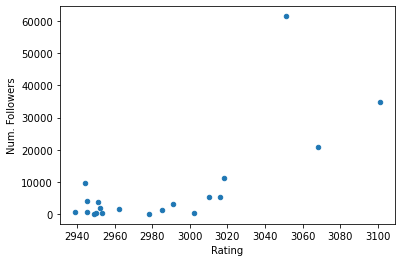

In [225]:
test.plot.scatter(x='Rating', y='Num. Followers')

<AxesSubplot:>

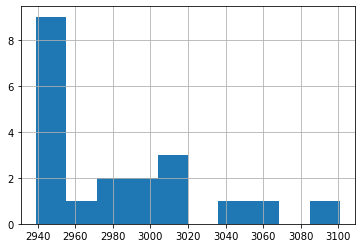

In [229]:
test['Rating'].hist(bins=10)

In [230]:
test.to_csv("Lichess.org Scrape.csv")

In [78]:
import time

# define function
def scrape_user_stats(lichess_user_id):
    print(user_ID)
    
    player_url = "https://lichess.org/@/" + user_ID
    print(player_url)
    
    player_response = requests.get(player_url)
    
    player_soup = BeautifulSoup(player_response.text, 'html.parser')
    
    join_date = get_join_date(player_soup=player_soup)
    
    time_spent_online = get_time_spent_online(player_soup=player_soup)
    
    followers = get_num_followers(player_soup=player_soup)

# apply function
for user_ID in [players_df['Username'].iloc[0]]:
  
    scrape_user_stats(user_ID)

    time.sleep(1) 

nihalsarin2004
https://lichess.org/@/nihalsarin2004


NameError: name 'get_join_date' is not defined

In [98]:
# let's get their join date
# member_since = player_soup.select('.thin:nth-child(1)')

# let's see its format
# print(member_since)

# we need to get the text from here and clean it
# member_since.text

# we forgot that member_since is a list! (even though it just has one element, it's' still a list).
# let's get the text from its only element:
# print([x.text for x in member_since])

# great! we just need to clean this to get useful information out - we're almost there
def get_membership_date(string):
    split_str = string.split('since')[1]
    return split_str

#test our function:
# print(get_membership_date([x.text for x in member_since][0]))

# ok the function looks good, let's put it into our 

In [ ]:
def get_join_date(player_soup):
    member_since = player_soup.select('.thin:nth-child(1)')
    
    return get_membership_date([x.text for x in member_since][0])

### Get Time Spent Online

In [73]:
def get_time_spent_online(player_soup):

    time_spent = player_soup.select('p:nth-child(4)')
    
    time_spent = [x.text for x in time_spent]
    
    return time_spent

In [74]:
get_time_spent_online(player_soup)

NameError: name 'player_soup' is not defined

### Get # followers 

In [75]:
def get_num_followers(player_soup):
    num_followers = player_soup.select('.user-show__social .nm-item:nth-child(1)')
    
    num_followers = [x.text for x in num_followers]
    
    num_followers = num_followers[0].split('f')[0]
    
    num_followers = num_followers.replace(',','')
    
    num_followers = int(num_followers)
    
    return num_followers

In [76]:
get_num_followers(player_soup)

NameError: name 'player_soup' is not defined

### Get bio - NOT DONE!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

In [ ]:
def get_bio(player_soup):
    
    bio = player_soup.select('.bio')
    
    print(bio)

In [ ]:
get_bio(player_soup)

In [ ]:
mik_url = "https://lichess.org/@/" + 'mgaster'
print(mik_url)

mik_response = requests.get(mik_url)

mik_soup = BeautifulSoup(mik_response.text, 'html.parser')

In [ ]:
player_soup.select('.patron')

In [ ]:
mik_soup.select('.patron')

# MAYBE TRY XPATH HERE?